In [8]:
import h5py
import numpy as np
import pandas as pd 
import os
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [9]:
def convert_csv_to_txt(input_file,output_file):
   
    with open(input_file, 'r') as csv_file, open(output_file, 'w') as space_delimited_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            space_delimited_file.write(' '.join(row) + '\n')

    print(f'CSV file "{input_file}" converted to space-delimited file "{output_file}"')


In [10]:
def read_file(file):
    hf = h5py.File(file, 'r')
    attributes = []
    for key in hf.keys():
        attributes.append(key)
    
    return attributes, hf

In [11]:
def get_data(hf,attributes):
    data = []
    pm = []
    acc_pm = []
    loss_pm = []
    loss_gm = []
    for i in range(len(attributes)):
        ai = hf.get(attributes[i])
        ai = np.array(ai)
        data.append(ai)
    
    return data

In [17]:
def plot_convergence(df_loss, fig_path):
    head_value = 1000
    df_loss = df_loss.head(head_value)
    fig, ax = plt.subplots(figsize=(6, 4))  # Use a single Axes instance
    colors = ['orange', 'green', 'magenta', 'grey']  # Define a color list for the lines

    # Plotting for df_loss
    for i, col in enumerate(df_loss.columns):
        line, = ax.plot(df_loss.index, df_loss[col], label=col, color=colors[i])
        # This adds the line with a specific color and label to the plot

    ax.set_xticks(range(0, head_value+1, int(head_value/5)))  # Setting x-axis ticks as specified
    ax.grid(True)
    
    # Label configuration
    ax.set_ylabel('Frank-Wolfe Gap', fontsize=16)
    ax.set_xlabel('Global Iteration', fontsize=16)
    
    # Legend configuration
    legend_fontsize = 16  # Specify font size here
    ax.legend(loc='upper right',ncol=2,  fontsize=legend_fontsize)
    
    plt.tight_layout()
    plt.savefig(fig_path + 'fw_gap_plot.png', bbox_inches='tight', dpi=300)
    plt.show()

In [15]:
def convergence_analysis(paths, fig_path, column_name):
    df_gap = pd.DataFrame()

    for i, path in enumerate(paths):
        dir_list = os.listdir(path)
        for file_name in dir_list:
        
            if file_name.endswith(".h5"):

                attributes, hf = read_file(path+file_name)

                data = get_data(hf,attributes)
                #id=0
                for key in hf.keys():
                    attributes.append(key)
                # print("id [",id,"] :", key)
                #id+=1
                    
                gap = np.array(hf.get('fw_gap'))
                    
                df_gap[column_name[i]] = gap[:1000]
                       
    plot_convergence(df_gap, fig_path)

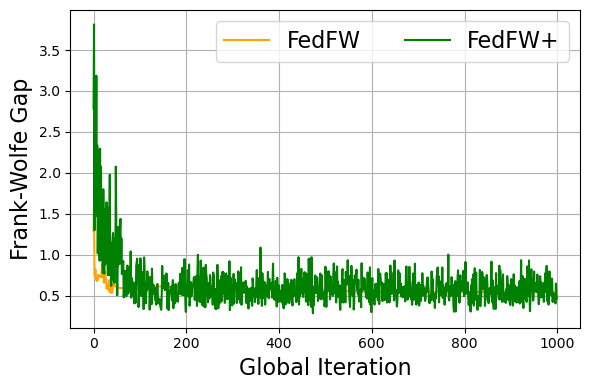

In [25]:
paths = ['/proj/sourasb-220503/codebase/FedFWplus/results/FedFW/SYNTHETIC/MCLR/perf/lmo_l2/3/new/',
'/proj/sourasb-220503/codebase/FedFWplus/results/FedFW_Plus/SYNTHETIC/MCLR/perf/lmo_l2/3/new/']
fig_path = '/proj/sourasb-220503/codebase/FedFWplus/results/gap_convergence/synthetic/lmo_l2/'
column_name = ['FedFW', 'FedFW+']
convergence_analysis(paths, fig_path, column_name)